In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sns

In [80]:
x,y=make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,class_sep=30,
                        hypercube=False, random_state=41)

In [ ]:
x

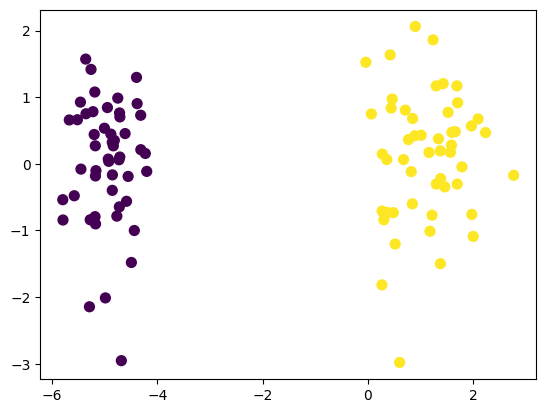

In [82]:
plt.scatter(x[:,0],x[:,1],c=y,s=50)

# Perceptron Trick Method

In [83]:
# w=w(old)-(lr)*Xi to move the line in positive direction
# w=w(old)+(lr)*Xi to move the line in negative direction
# more general equation is w=w(old)+lr(yi+yhat)*Xi
# Note the here w represents the equation Ax +yb +c

In [84]:
x.shape[0]

100

In [201]:
def move_line(X,Y):
  lr=0.3 # it can be 0.01 but its a hyper-param so we can alter it later
  X=np.insert(X,0,1,axis=1) # inserting the 1 at the beginning to make X0W0= W0
  w=np.ones(X.shape[1]) # intializing the weights randomly
  # we can run the loop as much we want but mostly it is 1000 or above so we will use 2000 here
  for i in range(5000):
    ran=np.random.randint(0,100)
    yhat= 1 if np.dot(X[ran], w) > 0 else 0
    w=w+(lr*(Y[ran]-yhat)*X[ran])
  return w[0],w[1:] # w[0] contains the intercept and w[1:] contains coefficants



In [202]:
intercept,coeff=move_line(x,y)

In [203]:
intercept

1.3

In [204]:
coeff

array([1.07987822, 0.45500818])

In [205]:
# if we have equation of type Ax+by+c=0 the slope can be defined as m=-a/b and c=-c/b

In [206]:
slope=-1*(coeff[0]/coeff[1])
b=-1*(intercept/coeff[1])

In [207]:
# y=mx+c
input=np.linspace(-5,5,400)
output=slope*input+b

In [208]:
input.shape

(400,)

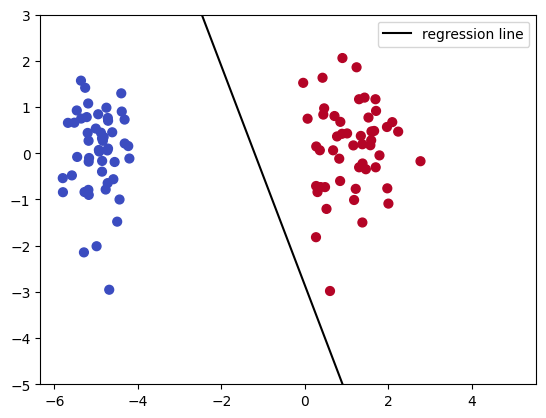

In [209]:
plt.plot(input,output, color='black',label='regression line')
plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='coolwarm')
plt.ylim(-5,3)
plt.legend()
plt.show()

In [210]:
# when we do the the summation of negative log of maximum likely hood its called crossentropy , we have to minimize the cross_entropy
# and to calculate the cross-entropy or loss , we dont have any kind of close formula so its obtained by the gradient descent technique
# from which we have obtained the formula as dL/dw=-1/n*(y-yhat)*X where n is the number of enteries/rows and y,yhat and x are the matrices of actual value , pred value and features where yhat=sigmoid(wX) and w represents the weight matrix

In [211]:
def sigmoid(val):
  return 1/(1+np.exp(-val))

In [225]:
#weight matrix will be updated by w=w+lr*1/m(y-yhat)X
def gradient_descent(x,y):
  lr=0.5 # it can be 0.01 but its a hyper-param so we can alter it later
  x=np.insert(x,0,1,axis=1) # inserting the 1 at the beginning to make X0W0= W0
  w=np.ones(x.shape[1]) # intializing the weights randomly
  # we can run the loop as much we want but mostly it is 1000 or above so we will use 2000 here
  for i in range(7000):
    ran=np.random.randint(0,100)
    yhat= sigmoid(np.dot(x[ran],w))
    w=w+lr*(np.dot((y-yhat),x)/x.shape[0]) # x.shape[0] is the total number of rows as defined above as n
  return w[0],w[1:] # w[0] contains the intercept and w[1:] contains coefficants

In [226]:
intercept_1,coeff_1=gd(x,y)

In [227]:
intercept_1

5.102916648814875

In [228]:
coeff_1

array([3.47974267, 0.13305072])

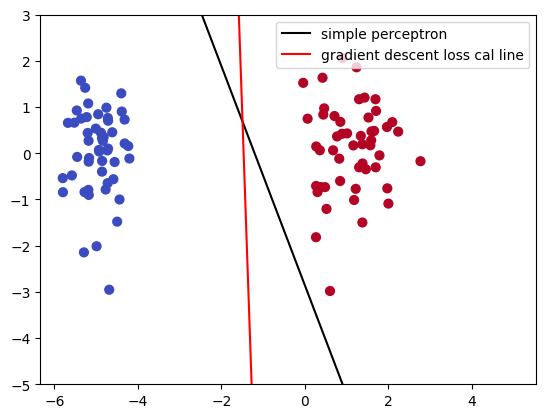

In [229]:
slope_1=-(coeff_1[0]/coeff_1[1])
b_1=-1*(intercept_1/coeff_1[1])
input_1=np.linspace(-5,5,400)
output_1=slope_1*input_1+b_1
plt.plot(input,output, color='black',label='simple perceptron')
plt.plot(input_1,output_1, color='red',label='gradient descent loss cal line')
plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='coolwarm')
plt.ylim(-5,3)
plt.legend()
plt.show()

# Comparing with Sckit Learn Logistic Regression Class

In [230]:
from sklearn.linear_model import LogisticRegression


In [242]:
logr=LogisticRegression(solver='sag')

In [243]:
logr.fit(x,y)

LogisticRegression(solver='sag')

In [244]:
# just get the intercept and coefficiants
logr.coef_

array([[1.76974357, 0.01266552]])

In [245]:
a=logr.coef_[0][0]
b=logr.coef_[0][1]
c=logr.intercept_

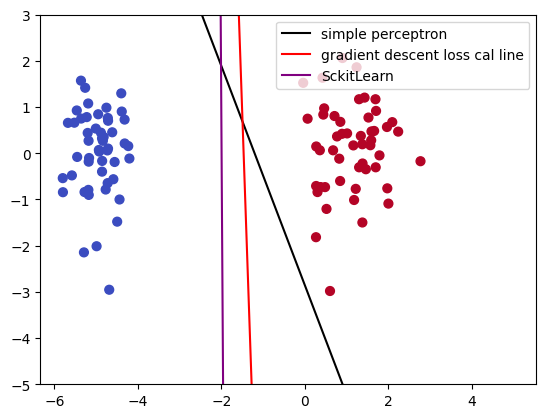

In [246]:
slope_2=-(a/b)
b_2=-(c/b)
input_2=np.linspace(-5,5,400)
output_2=slope_2*input_2+b_2
plt.plot(input,output, color='black',label='simple perceptron')
plt.plot(input_1,output_1, color='red',label='gradient descent loss cal line')
plt.plot(input_2,output_2, color='purple',label='SckitLearn')
plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='coolwarm')
plt.ylim(-5,3)
plt.legend()
plt.show()

In [241]:
# Its approximately equal to real class Logistic Regression of sklearn , this difference is just due to the hyperparameters like learning rate and in our case epochs are also a factor